<h1><center>Regression 1</center></h1>
<center>How well does Rotten Tomatoes score predict "best picture" at the Oscars?</center>

In [1]:
import numpy as np
import pandas as pd
import os

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

## Prepare data

In [2]:
data = pd.read_csv('../data/best_picture_data.csv')

In [3]:
data.head()

,Unnamed: 0,year_film,category,movie_title,winner,rotten_tomatoes_link,critic_name,top_critic,review_type,review_score
0,0,1927,OUTSTANDING PICTURE,The Racket,False,m/racket,Dennis Schwartz,False,Rotten,73.0
1,2,1927,OUTSTANDING PICTURE,The Racket,False,m/racket,Emanuel Levy,False,Rotten,78.0
2,4,1927,OUTSTANDING PICTURE,Wings,True,m/wings,John A. Nesbit,False,Fresh,88.0
3,5,1927,OUTSTANDING PICTURE,Wings,True,m/wings,Emanuel Levy,False,Fresh,88.0
4,6,1927,OUTSTANDING PICTURE,Wings,True,m/wings,Dennis Schwartz,False,Fresh,85.0


## Plot this data

In [4]:
import matplotlib.pyplot as plt

def plot_binned_data(data: pd.DataFrame): 
    bin_labels = ['80-100', '60-80', '40-60', '20-40', '0-20']
    data.loc[(data['review_score'] > 0 ) & (data['review_score'] <= 20), 'bin'] = '0-20'
    data.loc[(data['review_score'] > 20 ) & (data['review_score'] <= 40), 'bin'] = '20-40'
    data.loc[(data['review_score'] > 40 ) & (data['review_score'] <= 60), 'bin'] = '40-60'
    data.loc[(data['review_score'] > 60 ) & (data['review_score'] <= 80), 'bin'] = '60-80'
    data.loc[(data['review_score'] > 80 ) & (data['review_score'] <= 100), 'bin'] = '80-100'
    
    plot_data = data[['bin', 'winner']]
    plot_data = plot_data.value_counts().reset_index()
    plot_data.columns = ['bin', 'winner', 'counts']
    
    # Make data square 
    square_data = [(x, y) for x in bin_labels for y in [True, False]]
    square_data = pd.DataFrame(square_data, columns = ['bin', 'winner'])
    square_data['counts_square'] = 0
    plot_data = plot_data.merge(square_data, on=['bin', 'winner'], how='outer')
    plot_data.loc[plot_data['counts'].isna(), 'counts'] = plot_data.loc[plot_data['counts'].isna(), 'counts_square']
    
    N = 5
    yes_means = plot_data.loc[plot_data['winner']==True, 'counts']
    no_means = plot_data.loc[plot_data['winner']==False, 'counts']

    ind = np.arange(N)  # the x locations for the groups
    width = 0.35       # the width of the bars

    fig, ax = plt.subplots()
    ax.bar(ind, yes_means, width, color='g')
    ax.bar(ind + width, no_means, width, color='r')

    ax.set_ylabel('Number of ratings')
    ax.set_title('Ratings bins by Oscars win/loss')
    ax.set_xticks(ind + width / 2)
    ax.set_xticklabels(bin_labels)

    ax.legend(('Win', 'Loss'))

    plt.show()

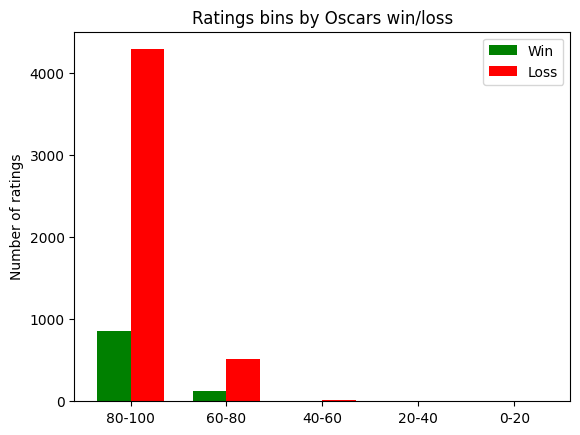

In [5]:
plot_binned_data(data)

This is telling me that a rotten tomatoes rating might not be a good predictor of an Oscars win. 
Maybe try reviewing some of these low-scoring Oscars wins by hand. 

In [6]:
data.loc[(data['winner']==True) & (data['review_score']<50)]

,Unnamed: 0,year_film,category,movie_title,winner,rotten_tomatoes_link,critic_name,top_critic,review_type,review_score,bin
1120,1249,1999,BEST PICTURE,American Beauty,True,m/american_beauty,Steven D. Greydanus,False,Rotten,40.0,20-40
1220,1358,2000,BEST PICTURE,Gladiator,True,m/gladiator,Chuck Rudolph,False,Rotten,40.0,20-40
1720,1891,2004,BEST PICTURE,Million Dollar Baby,True,m/million_dollar_baby,Steven D. Greydanus,False,Rotten,40.0,20-40


In [7]:
data.loc[(data['movie_title']=='American Beauty')]

,Unnamed: 0,year_film,category,movie_title,winner,rotten_tomatoes_link,critic_name,top_critic,review_type,review_score,bin
1110,1239,1999,BEST PICTURE,American Beauty,True,m/american_beauty,Scott A. Mantz,False,Fresh,100.0,80-100
1111,1240,1999,BEST PICTURE,American Beauty,True,m/american_beauty,Bryant Frazer,False,Fresh,85.0,80-100
1112,1241,1999,BEST PICTURE,American Beauty,True,m/american_beauty,Eugene Novikov,False,Fresh,95.0,80-100
1113,1242,1999,BEST PICTURE,American Beauty,True,m/american_beauty,Eric D. Snider,False,Fresh,95.0,80-100
1114,1243,1999,BEST PICTURE,American Beauty,True,m/american_beauty,Ross Anthony,False,Fresh,88.0,80-100
1115,1244,1999,BEST PICTURE,American Beauty,True,m/american_beauty,E! Staff,False,Fresh,95.0,80-100
1116,1245,1999,BEST PICTURE,American Beauty,True,m/american_beauty,Owen Gleiberman,True,Fresh,88.0,80-100
1117,1246,1999,BEST PICTURE,American Beauty,True,m/american_beauty,Dennis Schwartz,False,Fresh,88.0,80-100
1118,1247,1999,BEST PICTURE,American Beauty,True,m/american_beauty,William Arnold,False,Fresh,95.0,80-100
1119,1248,1999,BEST PICTURE,American Beauty,True,m/american_beauty,Chuck Rudolph,False,Rotten,75.0,60-80


It looks like there is just one critic that gave "American Beauty" a low score. 
Maybe we would do better here if we averaged the rotten tomatoes score? 

In [8]:
data = data.groupby(['year_film', 'movie_title', 'winner'])['review_score'].mean().reset_index()
data.head()

,year_film,movie_title,winner,review_score
0,1927,The Racket,False,75.500000
1,1927,Wings,True,87.000000
2,1928,In Old Arizona,False,75.000000
3,1928,The Broadway Melody,True,78.000000
4,1928,The Patriot,False,80.714286


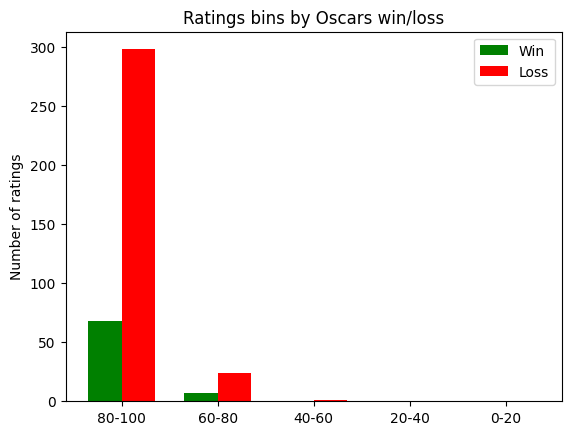

In [9]:
plot_binned_data(data)

## Run model

In [10]:
X = np.array(data['review_score'])
X = X.reshape(-1, 1)

y = data['winner'].astype(int)

In [11]:
model = LogisticRegression(random_state=0).fit(X, y)

In [12]:
model.coef_

array([[-0.01664705]])

In [13]:
preds = model.predict(X)
accuracy_score(y, preds)

0.8115577889447236

In [14]:
## Which movies does this make an incorrect prediction for? Why? 
preds

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [15]:
data.head()

,year_film,movie_title,winner,review_score,bin
0,1927,The Racket,False,75.500000,60-80
1,1927,Wings,True,87.000000,80-100
2,1928,In Old Arizona,False,75.000000,60-80
3,1928,The Broadway Melody,True,78.000000,60-80
4,1928,The Patriot,False,80.714286,80-100


In [16]:
y[0:5]

0    0
1    1
2    0
3    1
4    0
Name: winner, dtype: int64

In [17]:
data.winner.value_counts()

False    323
True      75
Name: winner, dtype: int64

In [18]:
model = LogisticRegression(random_state=0, solver='liblinear').fit(X, y)

In [19]:
model.coef_

array([[-0.01647556]])

In [20]:
preds = model.predict(X)
accuracy_score(y, preds)

0.8115577889447236

In [21]:
preds

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

## Try setting the class weight parameter to "balanced". This should give a higher penalty for predicting a loss incorrectly. 

In [22]:
model = LogisticRegression(random_state=0, solver='liblinear', class_weight='balanced').fit(X, y)

In [23]:
model.coef_

array([[-0.00262626]])

In [24]:
preds = model.predict(X)
accuracy_score(y, preds)

0.592964824120603

In [25]:
preds

array([1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,

In [26]:
# Okay, this is too strong! Back off model. 
# Let's try some custom dictionaries of weights. 
weights = {1: 5, 0: 1} # Give a win a weight of 5, versus a weight of 1 for a loss. 
model = LogisticRegression(random_state=0, solver='liblinear', class_weight=weights).fit(X, y)
model.coef_

array([[-0.00277362]])

In [27]:
preds = model.predict(X)
accuracy_score(y, preds)

0.1884422110552764

In [28]:
preds

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [29]:
weights = {1: 3, 0: 1} # A weight of 5 is too strong - try a weight of 3. 
model = LogisticRegression(random_state=0, solver='liblinear', class_weight=weights).fit(X, y)
preds = model.predict(X)
preds

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [30]:
any(preds > 0)

False

In [31]:
# A weight of 3 is too light. 
# Write an algorithm to find the best weight for a win in .10 increments between 3 and 5. 
weights_to_test = np.arange(3, 5, .10)
weights_to_test

array([3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2,
       4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9])

In [32]:
# Our scoring algorithm will be: 
# 1. You must predict at least one win for all input data 
# 2. Take the model with the highest accuracy. 
results = {}
for weight in weights_to_test:
    weights = {1: weight, 0: 1} # 'Loss' class always stays at 1
    model = LogisticRegression(random_state=0, solver='liblinear', class_weight=weights).fit(X, y)
    preds = model.predict(X)
    
    results[weight] = {
        'any_win': any(preds > 0),
        'accuracy': accuracy_score(y, preds)
    }

In [33]:
results

{3.0: {'any_win': False, 'accuracy': 0.8115577889447236},
 3.1: {'any_win': False, 'accuracy': 0.8115577889447236},
 3.2: {'any_win': False, 'accuracy': 0.8115577889447236},
 3.3000000000000003: {'any_win': False, 'accuracy': 0.8115577889447236},
 3.4000000000000004: {'any_win': False, 'accuracy': 0.8115577889447236},
 3.5000000000000004: {'any_win': False, 'accuracy': 0.8115577889447236},
 3.6000000000000005: {'any_win': False, 'accuracy': 0.8115577889447236},
 3.7000000000000006: {'any_win': False, 'accuracy': 0.8115577889447236},
 3.8000000000000007: {'any_win': True, 'accuracy': 0.8090452261306532},
 3.900000000000001: {'any_win': True, 'accuracy': 0.8090452261306532},
 4.000000000000001: {'any_win': True, 'accuracy': 0.8065326633165829},
 4.100000000000001: {'any_win': True, 'accuracy': 0.8040201005025126},
 4.200000000000001: {'any_win': True, 'accuracy': 0.7713567839195979},
 4.300000000000001: {'any_win': True, 'accuracy': 0.6030150753768844},
 4.400000000000001: {'any_win': Tr

In [34]:
# Interesting. Make some plots here. 
# For weight = 3.9, what do the predictions look like? 
weights = {1: 3.9, 0: 1} # 'Loss' class always stays at 1
model = LogisticRegression(random_state=0, solver='liblinear', class_weight=weights).fit(X, y)
preds = model.predict(X)
preds

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [35]:
weights_to_test = np.arange(3.5, 4.0, .001)
weights_to_test

array([3.5  , 3.501, 3.502, 3.503, 3.504, 3.505, 3.506, 3.507, 3.508,
       3.509, 3.51 , 3.511, 3.512, 3.513, 3.514, 3.515, 3.516, 3.517,
       3.518, 3.519, 3.52 , 3.521, 3.522, 3.523, 3.524, 3.525, 3.526,
       3.527, 3.528, 3.529, 3.53 , 3.531, 3.532, 3.533, 3.534, 3.535,
       3.536, 3.537, 3.538, 3.539, 3.54 , 3.541, 3.542, 3.543, 3.544,
       3.545, 3.546, 3.547, 3.548, 3.549, 3.55 , 3.551, 3.552, 3.553,
       3.554, 3.555, 3.556, 3.557, 3.558, 3.559, 3.56 , 3.561, 3.562,
       3.563, 3.564, 3.565, 3.566, 3.567, 3.568, 3.569, 3.57 , 3.571,
       3.572, 3.573, 3.574, 3.575, 3.576, 3.577, 3.578, 3.579, 3.58 ,
       3.581, 3.582, 3.583, 3.584, 3.585, 3.586, 3.587, 3.588, 3.589,
       3.59 , 3.591, 3.592, 3.593, 3.594, 3.595, 3.596, 3.597, 3.598,
       3.599, 3.6  , 3.601, 3.602, 3.603, 3.604, 3.605, 3.606, 3.607,
       3.608, 3.609, 3.61 , 3.611, 3.612, 3.613, 3.614, 3.615, 3.616,
       3.617, 3.618, 3.619, 3.62 , 3.621, 3.622, 3.623, 3.624, 3.625,
       3.626, 3.627,

In [36]:
# Check hundredths between 3.5 and 4.0. 
# 1. You must predict at least one win for all input data 
# 2. Take the model with the highest accuracy. 
results = {}
for weight in weights_to_test:
    weights = {1: weight, 0: 1} # 'Loss' class always stays at 1
    model = LogisticRegression(random_state=0, solver='liblinear', class_weight=weights).fit(X, y)
    preds = model.predict(X)
    
    results[weight] = {
        'any_win': any(preds > 0),
        'accuracy': accuracy_score(y, preds)
    }

In [37]:
results

{3.5: {'any_win': False, 'accuracy': 0.8115577889447236},
 3.501: {'any_win': False, 'accuracy': 0.8115577889447236},
 3.502: {'any_win': False, 'accuracy': 0.8115577889447236},
 3.5029999999999997: {'any_win': False, 'accuracy': 0.8115577889447236},
 3.5039999999999996: {'any_win': False, 'accuracy': 0.8115577889447236},
 3.5049999999999994: {'any_win': False, 'accuracy': 0.8115577889447236},
 3.5059999999999993: {'any_win': False, 'accuracy': 0.8115577889447236},
 3.5069999999999992: {'any_win': False, 'accuracy': 0.8115577889447236},
 3.507999999999999: {'any_win': False, 'accuracy': 0.8115577889447236},
 3.508999999999999: {'any_win': False, 'accuracy': 0.8115577889447236},
 3.509999999999999: {'any_win': False, 'accuracy': 0.8115577889447236},
 3.510999999999999: {'any_win': False, 'accuracy': 0.8115577889447236},
 3.5119999999999987: {'any_win': False, 'accuracy': 0.8115577889447236},
 3.5129999999999986: {'any_win': False, 'accuracy': 0.8115577889447236},
 3.5139999999999985: {'

In [38]:
crossover_value = 0
for k, v in results.items():
    if v['any_win'] == True:
        crossover_value = k
        break
print(f"Found crossover value {crossover_value}!")

Found crossover value 3.728999999999975!


In [39]:
weights = {1: crossover_value, 0: 1} # 'Loss' class always stays at 1
model = LogisticRegression(random_state=0, solver='liblinear', class_weight=weights).fit(X, y)
preds = model.predict(X)

any_win_accuracy = accuracy_score(y, preds)

In [40]:
weights = {1: 1, 0: 1} # 'Loss' class always stays at 1
model = LogisticRegression(random_state=0, solver='liblinear', class_weight=weights).fit(X, y)
preds = model.predict(X)

assert all(pre)
no_win_accuracy_score = accuracy_score(y, preds)

NameError: name 'pre' is not defined